# Phần 1
## Import các thư viện

In [1]:
import os
import gc
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()
from imblearn.over_sampling import RandomOverSampler
from functools import reduce

## Import dữ liệu từ Google drive

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import zipfile
downloaded = drive.CreateFile({'id':"13wjGQ896xD3My0xv5YzWqtM7KzNxGgD4"})
downloaded.GetContentFile('data.zip')
zip_ref = zipfile.ZipFile("data.zip", 'r')
zip_ref.extractall("./data")
zip_ref.close()

## Đọc và kiểm tra dữ liệu

In [3]:
application_train = pd.read_csv('./data/application_train.csv')
POS_CASH_balance = pd.read_csv('./data/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('./data/bureau_balance.csv')
previous_application = pd.read_csv('./data/previous_application.csv')
installments_payments = pd.read_csv('./data/installments_payments.csv')
credit_card_balance = pd.read_csv('./data/credit_card_balance.csv')
bureau = pd.read_csv('./data/bureau.csv')
application_test = pd.read_csv('./data/application_test.csv')

In [ ]:
print('Bảng application_train gồm : {0} hàng và {1} feature'.format(application_train.shape[0],application_train.shape[1]))
print('Bảng application_test gồm : {0} hàng và {1} feature'.format(application_test.shape[0],application_test.shape[1]))
print('Bảng previous_application gồm: {0} hàng và {1} feature'.format(previous_application.shape[0],previous_application.shape[1]))
print('Bảng POS_CASH_balance gồm : {0} hàng và {1} feature'.format(POS_CASH_balance.shape[0],POS_CASH_balance.shape[1]))
print('Bảng bureau gồm : {0} hàng và {1} feature'.format(bureau.shape[0],bureau.shape[1]))
print('Bảng bureau_balance gồm: {0} hàng và {1} feature'.format(bureau_balance.shape[0],bureau_balance.shape[1]))
print('Bảng credit_card_balance gồm: {0} hàng và {1} feature'.format(credit_card_balance.shape[0],credit_card_balance.shape[1]))
print('Bảng installments_payments gồm: {0} hàng và {1} feature'.format(installments_payments.shape[0],installments_payments.shape[1]))

Bảng application_train gồm : 307511 hàng và 122 feature
Bảng application_test gồm : 48744 hàng và 121 feature
Bảng previous_application gồm: 1670214 hàng và 37 feature
Bảng POS_CASH_balance gồm : 10001358 hàng và 8 feature
Bảng bureau gồm : 1716428 hàng và 17 feature
Bảng bureau_balance gồm: 27299925 hàng và 3 feature
Bảng credit_card_balance gồm: 3840312 hàng và 23 feature
Bảng installments_payments gồm: 13605401 hàng và 8 feature


In [ ]:
# Xem qua dữ liệu của bảng application_train
application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Kiểm tra dữ liệu của bảng application_train
null_counts = application_train.isnull().sum()
null_percent = ((null_counts / len(application_train)) * 100)
null_info = pd.DataFrame({
    'null': null_counts,
    'Phần trăm giá trị null': null_percent
}).sort_values(by='null', ascending=False)
print(null_info)

                            null  Phần trăm giá trị null
COMMONAREA_MEDI           214865               69.872297
COMMONAREA_AVG            214865               69.872297
COMMONAREA_MODE           214865               69.872297
NONLIVINGAPARTMENTS_MODE  213514               69.432963
NONLIVINGAPARTMENTS_AVG   213514               69.432963
...                          ...                     ...
NAME_HOUSING_TYPE              0                0.000000
NAME_FAMILY_STATUS             0                0.000000
NAME_EDUCATION_TYPE            0                0.000000
NAME_INCOME_TYPE               0                0.000000
SK_ID_CURR                     0                0.000000

[122 rows x 2 columns]


In [ ]:
# Xem qua dữ liệu của bảng application_test
application_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Kiểm tra dữ liệu của bảng application_test
null_counts = application_test.isnull().sum()
null_percent = ((null_counts / len(application_test)) * 100)
null_info = pd.DataFrame({
    'null': null_counts,
    'Phần trăm giá trị null': null_percent
}).sort_values(by='null', ascending=False)
print(null_info)

                           null  Phần trăm giá trị null
COMMONAREA_AVG            33495               68.716150
COMMONAREA_MODE           33495               68.716150
COMMONAREA_MEDI           33495               68.716150
NONLIVINGAPARTMENTS_AVG   33347               68.412523
NONLIVINGAPARTMENTS_MODE  33347               68.412523
...                         ...                     ...
NAME_HOUSING_TYPE             0                0.000000
NAME_FAMILY_STATUS            0                0.000000
NAME_EDUCATION_TYPE           0                0.000000
NAME_INCOME_TYPE              0                0.000000
SK_ID_CURR                    0                0.000000

[121 rows x 2 columns]


In [ ]:
# Xem qua dữ liệu của bảng previous_application
previous_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Kiểm tra dữ liệu của bảng previous_application
null_counts = previous_application.isnull().sum()
null_percent = ((null_counts / len(previous_application)) * 100)
null_info = pd.DataFrame({
    'null': null_counts,
    'Phần trăm giá trị null': null_percent
}).sort_values(by='null', ascending=False)
print(null_info)

                                null  Phần trăm giá trị null
RATE_INTEREST_PRIVILEGED     1664263               99.643698
RATE_INTEREST_PRIMARY        1664263               99.643698
AMT_DOWN_PAYMENT              895844               53.636480
RATE_DOWN_PAYMENT             895844               53.636480
NAME_TYPE_SUITE               820405               49.119754
NFLAG_INSURED_ON_APPROVAL     673065               40.298129
DAYS_TERMINATION              673065               40.298129
DAYS_LAST_DUE                 673065               40.298129
DAYS_LAST_DUE_1ST_VERSION     673065               40.298129
DAYS_FIRST_DUE                673065               40.298129
DAYS_FIRST_DRAWING            673065               40.298129
AMT_GOODS_PRICE               385515               23.081773
AMT_ANNUITY                   372235               22.286665
CNT_PAYMENT                   372230               22.286366
PRODUCT_COMBINATION              346                0.020716
AMT_CREDIT              

In [ ]:
# Xem qua dữ liệu của bảng POS_CASH_balance
POS_CASH_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
# Kiểm tra dữ liệu của bảng POS_CASH_balance
null_counts = POS_CASH_balance.isnull().sum()
null_percent = ((null_counts / len(POS_CASH_balance)) * 100)
null_info = pd.DataFrame({
    'null': null_counts,
    'Phần trăm giá trị null': null_percent
}).sort_values(by='null', ascending=False)
print(null_info)

                        null  Phần trăm giá trị null
CNT_INSTALMENT_FUTURE  26087                0.260835
CNT_INSTALMENT         26071                0.260675
SK_ID_PREV                 0                0.000000
SK_ID_CURR                 0                0.000000
MONTHS_BALANCE             0                0.000000
NAME_CONTRACT_STATUS       0                0.000000
SK_DPD                     0                0.000000
SK_DPD_DEF                 0                0.000000


In [ ]:
# Xem qua dữ liệu của bảng bureau
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
# Kiểm tra dữ liệu của bảng bureau
null_counts = bureau.isnull().sum()
null_percent = ((null_counts / len(bureau)) * 100)
null_info = pd.DataFrame({
    'null': null_counts,
    'Phần trăm giá trị null': null_percent
}).sort_values(by='null', ascending=False)
print(null_info)

                           null  Phần trăm giá trị null
AMT_ANNUITY             1226791               71.473490
AMT_CREDIT_MAX_OVERDUE  1124488               65.513264
DAYS_ENDDATE_FACT        633653               36.916958
AMT_CREDIT_SUM_LIMIT     591780               34.477415
AMT_CREDIT_SUM_DEBT      257669               15.011932
DAYS_CREDIT_ENDDATE      105553                6.149573
AMT_CREDIT_SUM               13                0.000757
CREDIT_ACTIVE                 0                0.000000
CREDIT_CURRENCY               0                0.000000
DAYS_CREDIT                   0                0.000000
CREDIT_DAY_OVERDUE            0                0.000000
SK_ID_BUREAU                  0                0.000000
CNT_CREDIT_PROLONG            0                0.000000
AMT_CREDIT_SUM_OVERDUE        0                0.000000
CREDIT_TYPE                   0                0.000000
DAYS_CREDIT_UPDATE            0                0.000000
SK_ID_CURR                    0                0

In [ ]:
# Xem qua dữ liệu của bảng bureau_balance
bureau_balance.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
# Kiểm tra dữ liệu của bảng bureau_balance
null_counts = bureau_balance.isnull().sum()
null_percent = ((null_counts / len(bureau_balance)) * 100)
null_info = pd.DataFrame({
    'null': null_counts,
    'Phần trăm giá trị null': null_percent
}).sort_values(by='null', ascending=False)
print(null_info)

                null  Phần trăm giá trị null
SK_ID_BUREAU       0                     0.0
MONTHS_BALANCE     0                     0.0
STATUS             0                     0.0


In [ ]:
# Xem qua dữ liệu của bảng credit_card_balance
credit_card_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
# Kiểm tra dữ liệu của bảng credit_card_balance
null_counts = credit_card_balance.isnull().sum()
null_percent = ((null_counts / len(credit_card_balance)) * 100)
null_info = pd.DataFrame({
    'null': null_counts,
    'Phần trăm giá trị null': null_percent
}).sort_values(by='null', ascending=False)
print(null_info)

                              null  Phần trăm giá trị null
AMT_PAYMENT_CURRENT         767988               19.998063
AMT_DRAWINGS_ATM_CURRENT    749816               19.524872
CNT_DRAWINGS_POS_CURRENT    749816               19.524872
AMT_DRAWINGS_OTHER_CURRENT  749816               19.524872
AMT_DRAWINGS_POS_CURRENT    749816               19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816               19.524872
CNT_DRAWINGS_ATM_CURRENT    749816               19.524872
CNT_INSTALMENT_MATURE_CUM   305236                7.948208
AMT_INST_MIN_REGULARITY     305236                7.948208
SK_ID_PREV                       0                0.000000
AMT_TOTAL_RECEIVABLE             0                0.000000
SK_DPD                           0                0.000000
NAME_CONTRACT_STATUS             0                0.000000
CNT_DRAWINGS_CURRENT             0                0.000000
AMT_PAYMENT_TOTAL_CURRENT        0                0.000000
AMT_RECIVABLE                    0                0.0000

In [ ]:
# Xem qua dữ liệu của bảng installments_payments
installments_payments.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
# Kiểm tra dữ liệu của bảng installments_payments
null_counts = installments_payments.isnull().sum()
null_percent = ((null_counts / len(installments_payments)) * 100)
null_info = pd.DataFrame({
    'null': null_counts,
    'Phần trăm giá trị null': null_percent
}).sort_values(by='null', ascending=False)
print(null_info)

                        null  Phần trăm giá trị null
DAYS_ENTRY_PAYMENT      2905                0.021352
AMT_PAYMENT             2905                0.021352
SK_ID_PREV                 0                0.000000
SK_ID_CURR                 0                0.000000
NUM_INSTALMENT_VERSION     0                0.000000
NUM_INSTALMENT_NUMBER      0                0.000000
DAYS_INSTALMENT            0                0.000000
AMT_INSTALMENT             0                0.000000


#EDA

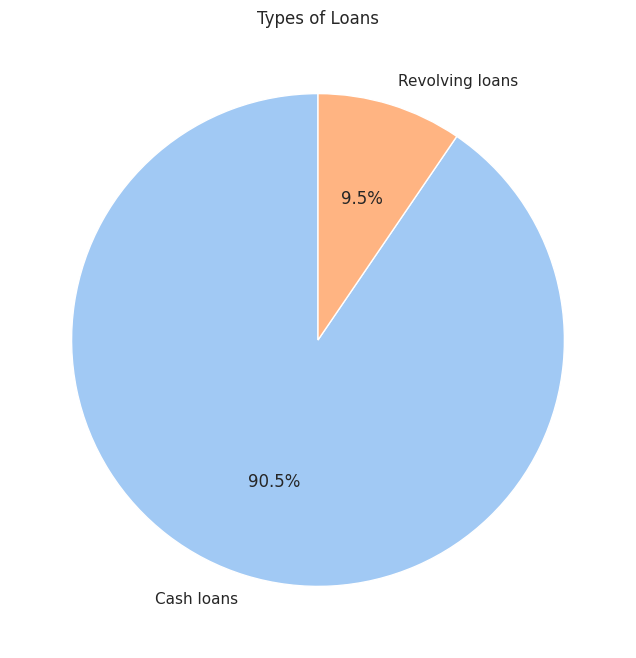

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Tính toán số lượng từng loại hợp đồng
temp = application_train["NAME_CONTRACT_TYPE"].value_counts()

# Tạo DataFrame từ Series temp
df = pd.DataFrame({"Contract Type": temp.index, "Count": temp.values})

# Thiết lập môi trường Seaborn
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Vẽ pie chart sử dụng Matplotlib
plt.figure(figsize=(8, 8))
plt.title("Types of Loans")

# Vẽ pie chart
plt.pie(df["Count"], labels=df["Contract Type"], autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))

plt.show()



Có thể thấy hầu hết khoản vay là tiền mặt (Cash loans)


<ipython-input-22-30e3bed8f25d>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




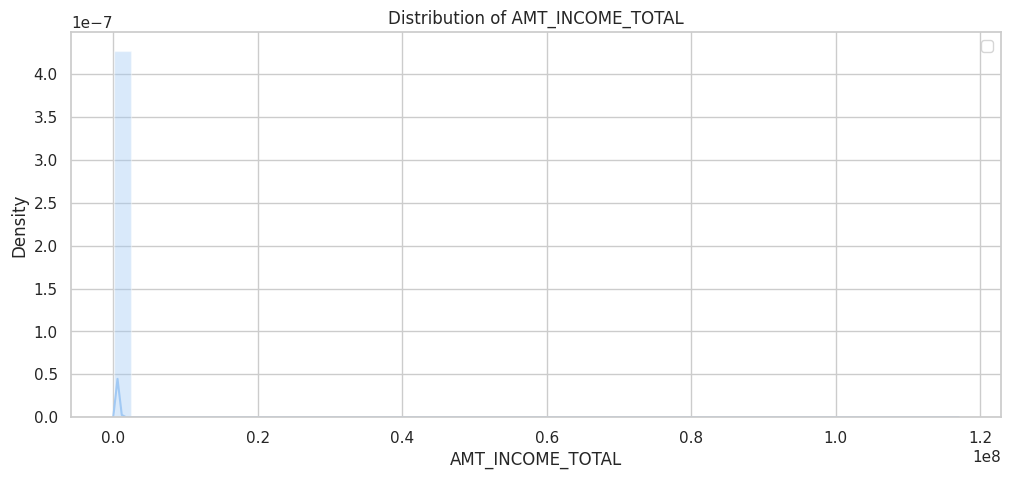

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
plt.legend()
ax1 = sns.distplot(application_train["AMT_INCOME_TOTAL"].dropna())
plt.show()

<Axes: title={'center': 'Distribution of AMT_CREDIT'}, xlabel='AMT_CREDIT', ylabel='Density'>

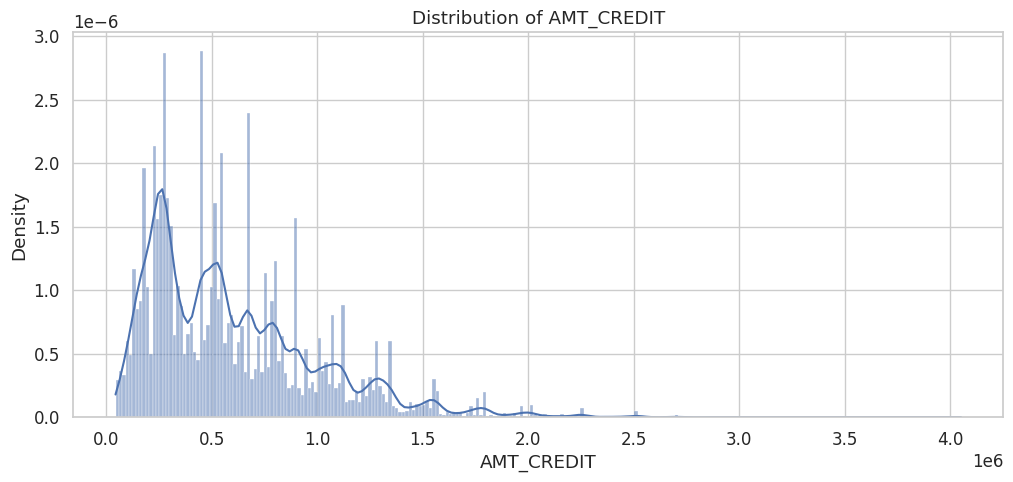

In [ ]:
#Credit amount of the loan
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
sns.histplot(application_train["AMT_CREDIT"].dropna(), kde=True, stat="density")

<Axes: title={'center': 'Distribution of AMT_GOODS_PRICE'}, xlabel='AMT_GOODS_PRICE', ylabel='Density'>

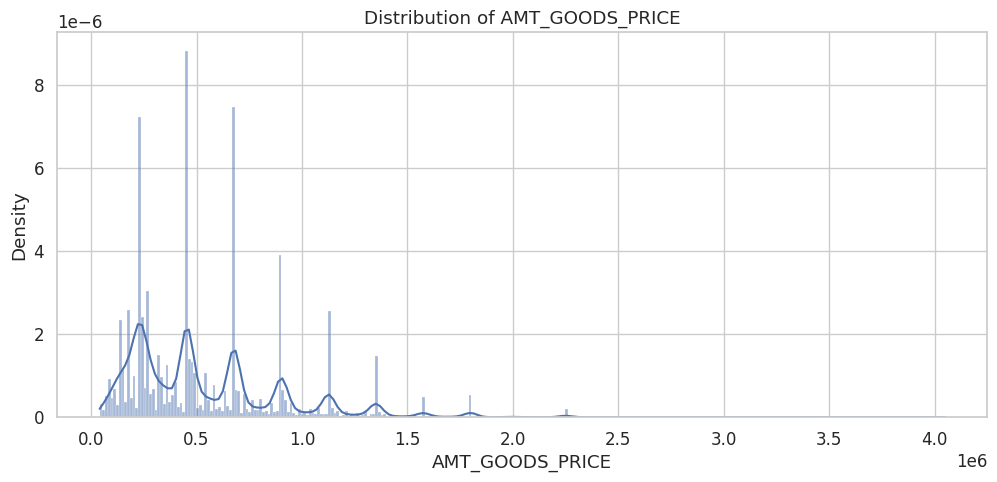

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
sns.histplot(application_train["AMT_GOODS_PRICE"].dropna(), kde=True, stat="density")

<ipython-input-25-4a6ca5b01b4b>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: title={'center': 'Distribution of AMT_GOODS_PRICE'}, xlabel='AMT_GOODS_PRICE', ylabel='Density'>

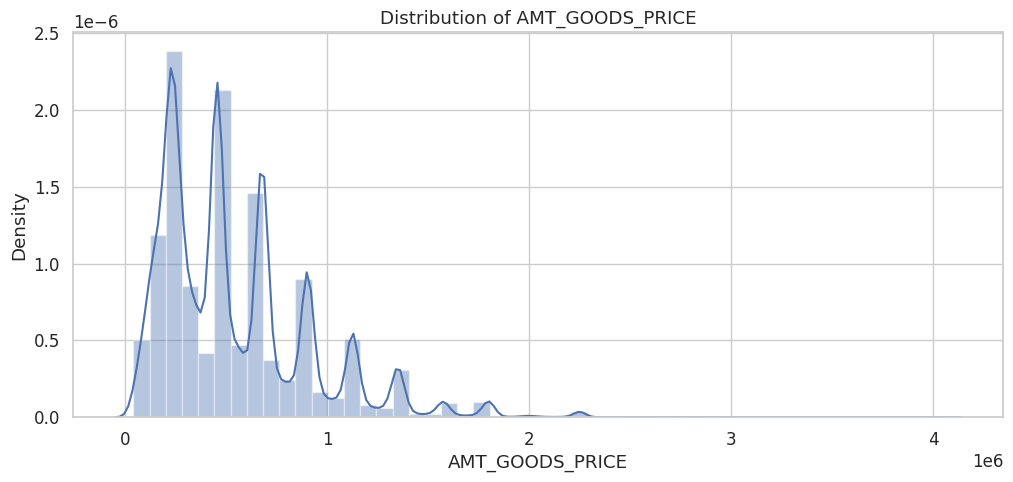

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
sns.distplot(application_train["AMT_GOODS_PRICE"].dropna())

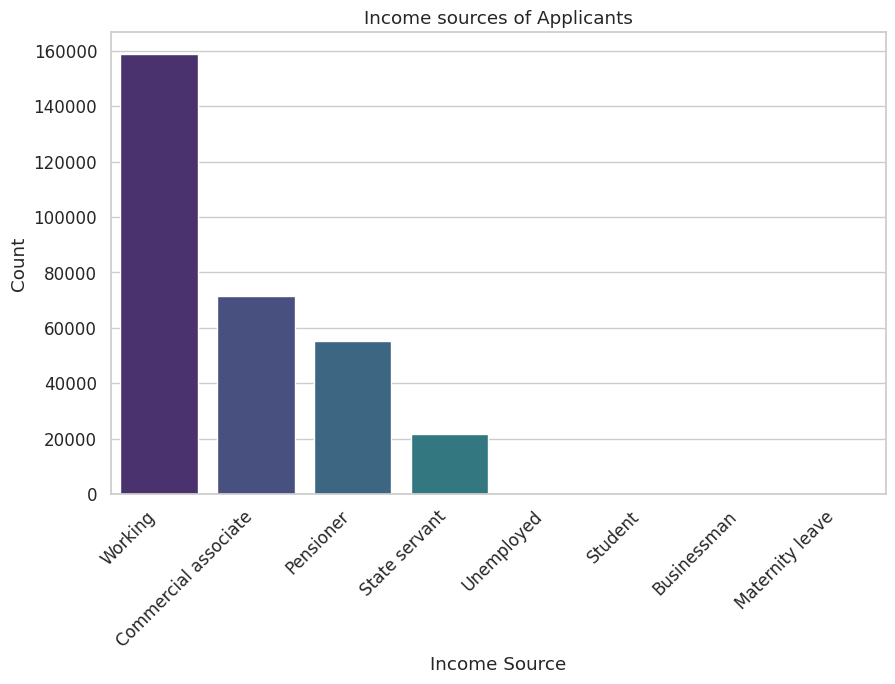

In [ ]:
temp = application_train["NAME_INCOME_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='labels', y='values', data=df, palette='viridis')
plt.title('Income sources of Applicants')
plt.xlabel('Income Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc hơn
plt.show()

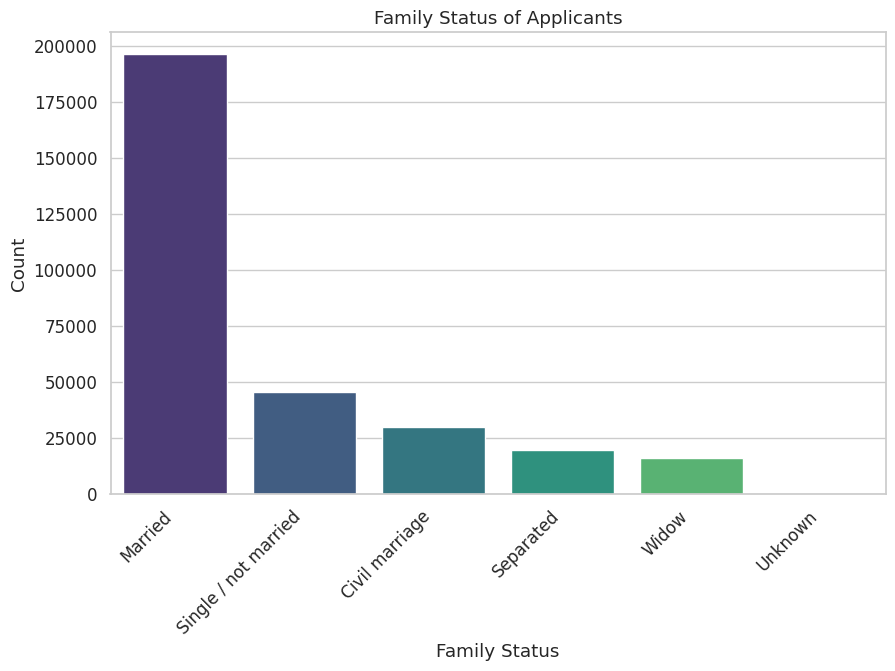

In [ ]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='labels', y='values', data=df, palette='viridis')
plt.title('Family Status of Applicants')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc hơn
plt.show()

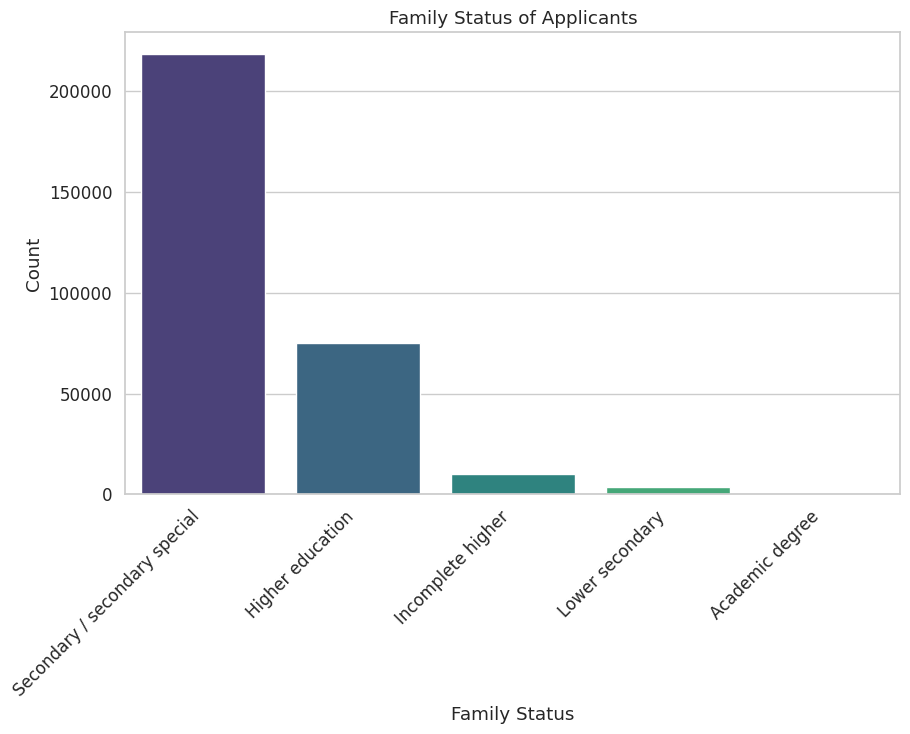

In [ ]:
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='labels', y='values', data=df, palette='viridis')
plt.title('Family Status of Applicants')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

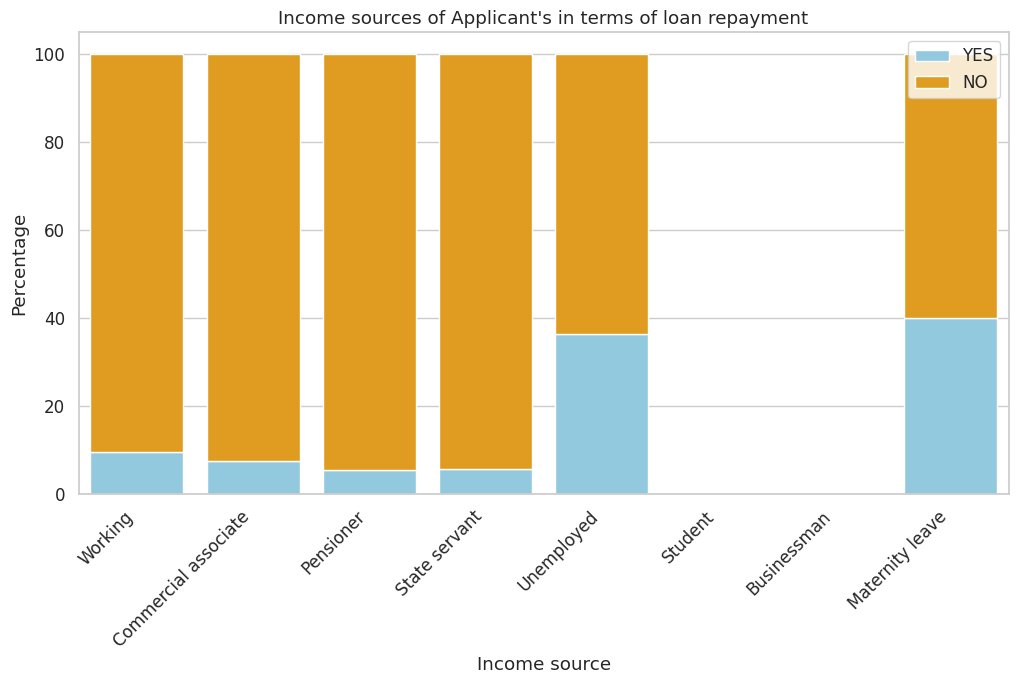

In [ ]:
# Giả sử 'application_train' là DataFrame của bạn và "NAME_INCOME_TYPE" và "TARGET" là cột bạn quan tâm
temp = application_train["NAME_INCOME_TYPE"].value_counts()
temp_df = pd.DataFrame(index=temp.index)
temp_df['YES'] = application_train.loc[application_train['TARGET'] == 1, 'NAME_INCOME_TYPE'].value_counts()
temp_df['NO'] = application_train.loc[application_train['TARGET'] == 0, 'NAME_INCOME_TYPE'].value_counts()

# Tính toán tỷ lệ phần trăm
temp_df['YES_percentage'] = (temp_df['YES'] / temp) * 100
temp_df['NO_percentage'] = (temp_df['NO'] / temp) * 100

# Vẽ biểu đồ cột với Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=temp_df.index, y=temp_df['YES_percentage'], color='skyblue', label='YES')
sns.barplot(x=temp_df.index, y=temp_df['NO_percentage'], color='orange', bottom=temp_df['YES_percentage'], label='NO')

plt.title("Income sources of Applicant's in terms of loan repayment")
plt.xlabel("Income source")
plt.ylabel("Percentage")
plt.legend()
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc hơn
plt.show()


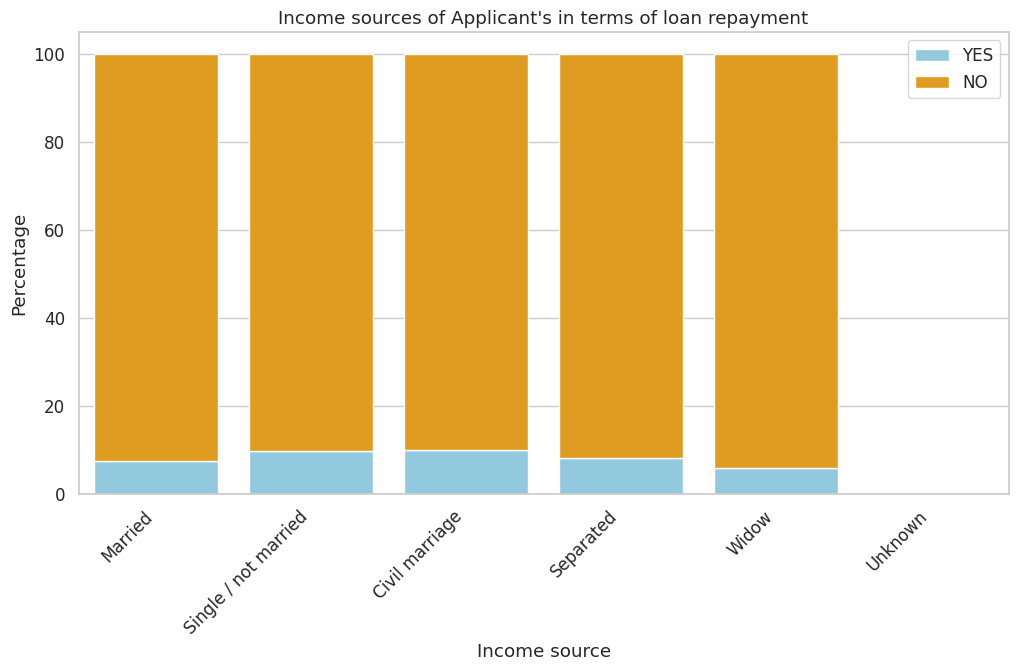

In [ ]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()
temp_df = pd.DataFrame(index=temp.index)
temp_df['YES'] = application_train.loc[application_train['TARGET'] == 1, "NAME_FAMILY_STATUS"].value_counts()
temp_df['NO'] = application_train.loc[application_train['TARGET'] == 0, "NAME_FAMILY_STATUS"].value_counts()

# Tính toán tỷ lệ phần trăm
temp_df['YES_percentage'] = (temp_df['YES'] / temp) * 100
temp_df['NO_percentage'] = (temp_df['NO'] / temp) * 100

# Vẽ biểu đồ cột với Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=temp_df.index, y=temp_df['YES_percentage'], color='skyblue', label='YES')
sns.barplot(x=temp_df.index, y=temp_df['NO_percentage'], color='orange', bottom=temp_df['YES_percentage'], label='NO')

plt.title("Income sources of Applicant's in terms of loan repayment")
plt.xlabel("Income source")
plt.ylabel("Percentage")
plt.legend()
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc hơn
plt.show()

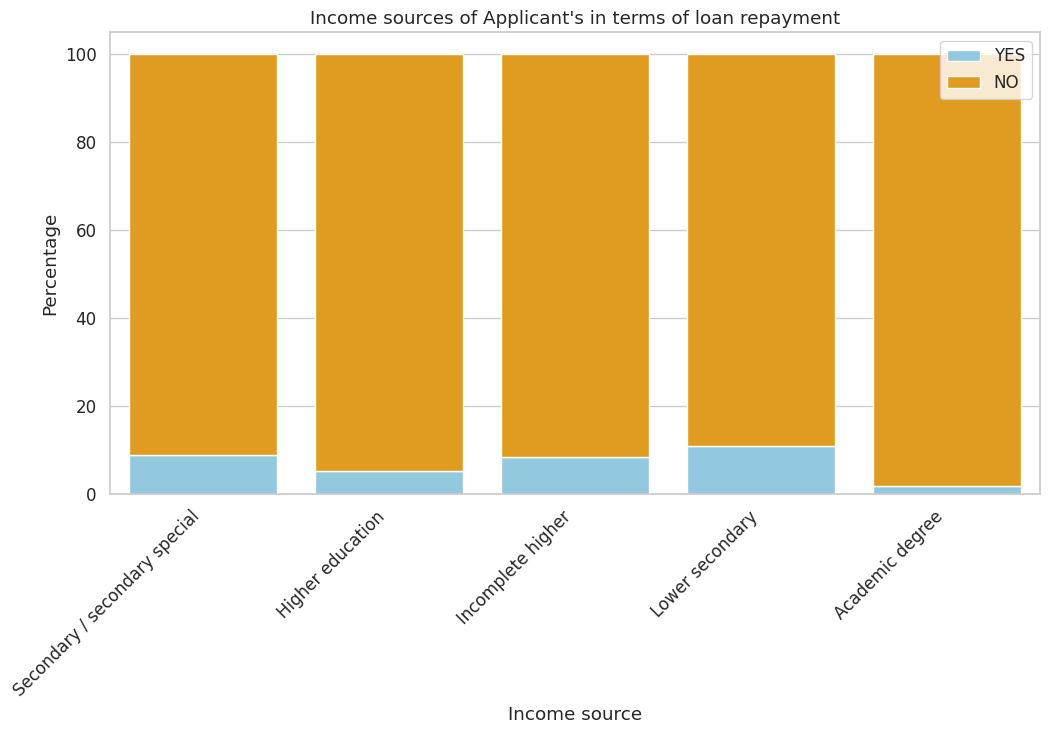

In [ ]:
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()
temp_df = pd.DataFrame(index=temp.index)
temp_df['YES'] = application_train.loc[application_train['TARGET'] == 1, "NAME_EDUCATION_TYPE"].value_counts()
temp_df['NO'] = application_train.loc[application_train['TARGET'] == 0, "NAME_EDUCATION_TYPE"].value_counts()

# Tính toán tỷ lệ phần trăm
temp_df['YES_percentage'] = (temp_df['YES'] / temp) * 100
temp_df['NO_percentage'] = (temp_df['NO'] / temp) * 100

# Vẽ biểu đồ cột với Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=temp_df.index, y=temp_df['YES_percentage'], color='skyblue', label='YES')
sns.barplot(x=temp_df.index, y=temp_df['NO_percentage'], color='orange', bottom=temp_df['YES_percentage'], label='NO')

plt.title("Income sources of Applicant's in terms of loan repayment")
plt.xlabel("Income source")
plt.ylabel("Percentage")
plt.legend()
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc hơn
plt.show()

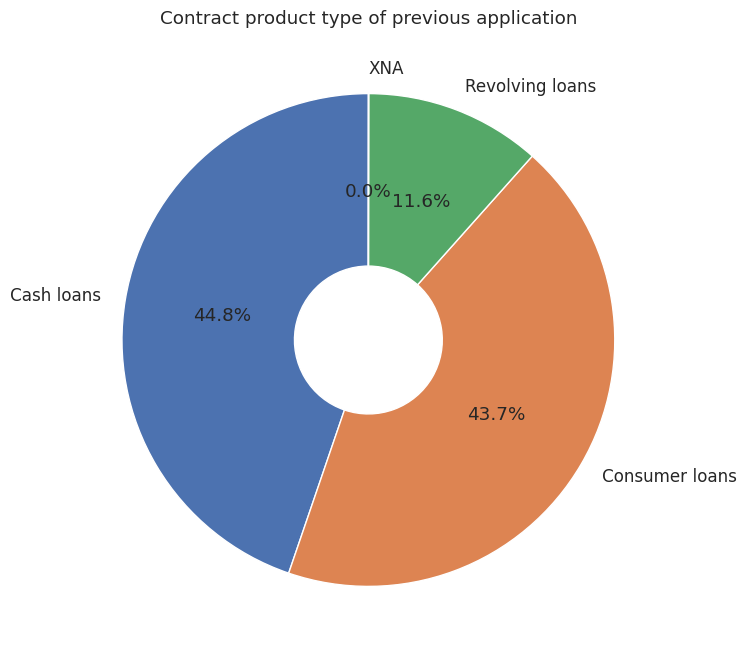

In [ ]:
# Giả sử 'previous_application' là DataFrame của bạn và "NAME_CONTRACT_TYPE" là cột bạn quan tâm
temp = previous_application["NAME_CONTRACT_TYPE"].value_counts()

# Vẽ biểu đồ bánh với Seaborn
plt.figure(figsize=(8, 8))
plt.title("Loại hợp đồng của khoản vay cũ")

# Sử dụng Seaborn để vẽ biểu đồ bánh
sns.set_palette("viridis")
plt.pie(temp, labels=temp.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.7))
plt.show()



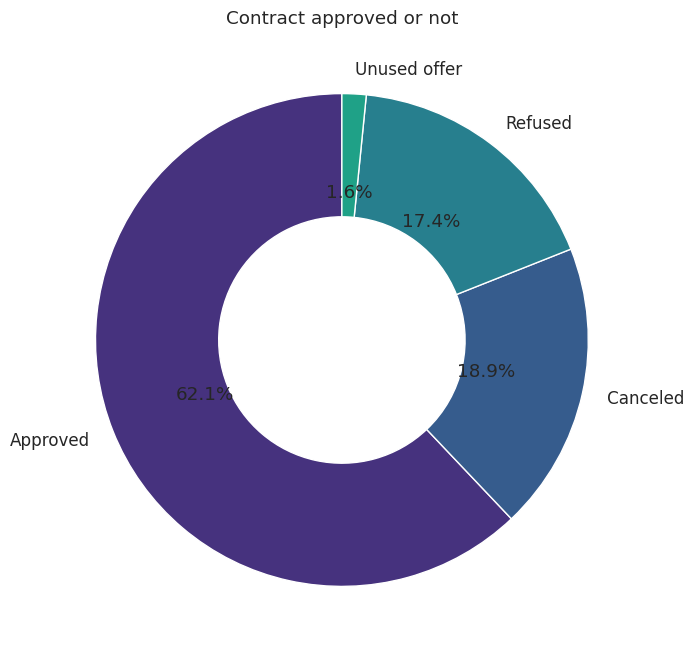

In [ ]:
temp = previous_application["NAME_CONTRACT_STATUS"].value_counts()

# Tạo DataFrame mới cho biểu đồ bánh
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

# Vẽ biểu đồ bánh với Seaborn
plt.figure(figsize=(8, 8))

# Sử dụng Seaborn để vẽ biểu đồ bánh
sns.set_palette("Set3")
plt.pie(df['values'], labels=df['labels'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
plt.show()


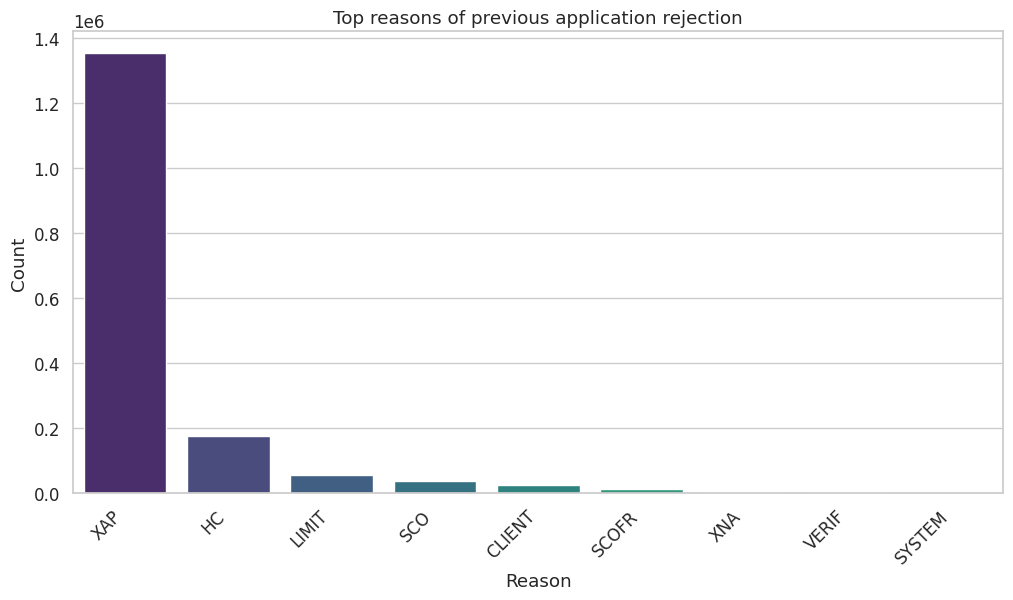

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử 'previous_application' là DataFrame của bạn và "CODE_REJECT_REASON" là cột bạn quan tâm
temp = previous_application["CODE_REJECT_REASON"].value_counts()

# Vẽ biểu đồ cột với Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=temp.index, y=temp.values, palette="viridis")

plt.title("Top reasons of previous application rejection")
plt.xlabel("Reason")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc hơn
plt.show()


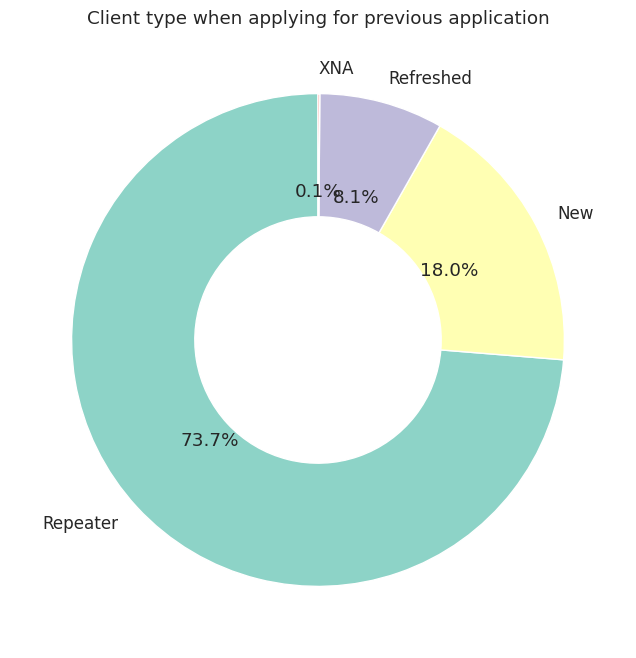

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử 'previous_application' là DataFrame của bạn và "NAME_CLIENT_TYPE" là cột bạn quan tâm
temp = previous_application["NAME_CLIENT_TYPE"].value_counts()

# Tạo DataFrame mới cho biểu đồ bánh
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

# Vẽ biểu đồ bánh với Seaborn
plt.figure(figsize=(8, 8))
plt.title("Client type when applying for previous application")

# Sử dụng Seaborn để vẽ biểu đồ bánh
sns.set_palette("pastel")
plt.pie(df['values'], labels=df['labels'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
plt.show()


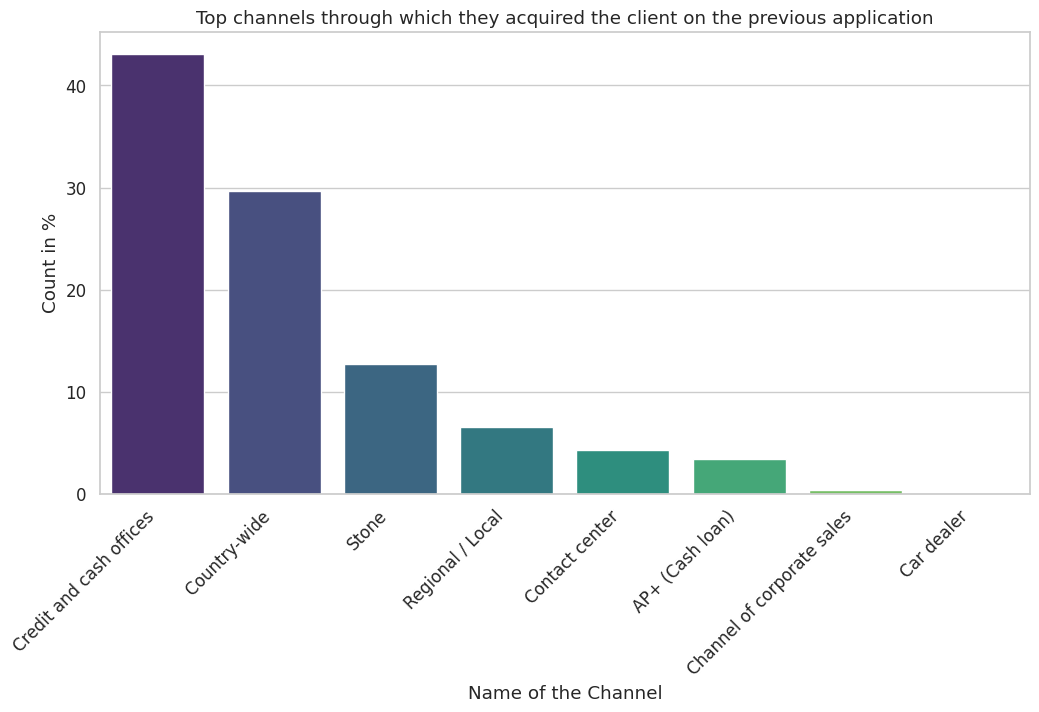

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử 'previous_application' là DataFrame của bạn và "CHANNEL_TYPE" là cột bạn quan tâm
temp = previous_application["CHANNEL_TYPE"].value_counts()

# Tính toán tỷ lệ phần trăm
percentage = (temp / temp.sum()) * 100

# Vẽ biểu đồ cột với Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=temp.index, y=percentage, palette="viridis")

plt.title("Top channels through which they acquired the client on the previous application")
plt.xlabel("Name of the Channel")
plt.ylabel("Count in %")
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc hơn
plt.show()


# Xử lý dữ liệu và tạo mô hình

In [ ]:
# Tính ma trận tương quan
correlation_matrix = application_train.corr()

# Lấy tương quan của thuộc tính "TARGET" với các thuộc tính khác
target_correlation = correlation_matrix['TARGET']

# Sắp xếp theo giá trị tuyệt đối của tương quan (để lấy giá trị tương quan nhỏ nhất)
sorted_correlation = target_correlation.abs().sort_values()

# Lấy tên của 10 thuộc tính ít liên quan nhất
least_correlated_features = sorted_correlation.head(20).index

# Hiển thị danh sách các thuộc tính ít liên quan nhất
print("Danh sách thuộc tính ít liên quan nhất đến TARGET:")
print(least_correlated_features)

<ipython-input-4-f4f4a068b66b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Danh sách thuộc tính ít liên quan nhất đến TARGET:
Index(['FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_5', 'FLAG_CONT_MOBILE', 'FLAG_MOBIL',
       'FLAG_DOCUMENT_12', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_7', 'NONLIVINGAPARTMENTS_MODE', 'FLAG_EMAIL',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'SK_ID_CURR', 'FLAG_DOCUMENT_4',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'NONLIVINGAPARTMENTS_MEDI',
       'LIVE_REGION_NOT_WORK_REGION', 'NONLIVINGAPARTMENTS_AVG',
       'FLAG_DOCUMENT_17'],
      dtype='object')


In [4]:
#Application data table preprocessing
#combining Application train and test Files
application=application_train.append(application_test, ignore_index=True,sort=False)
application.set_index('SK_ID_CURR')

#Filtring unwanted categorical variables
filteredColList =['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                   'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FONDKAPREMONT_MODE']
application = application[[x for x in list(application) if x not in filteredColList]]

#One-hot-encoding important categorical variables
oheCols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
application = pd.get_dummies(application,columns=oheCols)

# Adding new features based on old features
application['NEW_INCOME2Credit']=application['AMT_CREDIT']/application['AMT_INCOME_TOTAL']
application['NEW_AMT_INCOME_TOTAL2CNT_FAM_MEMBERS'] = application['AMT_INCOME_TOTAL'] / application['CNT_FAM_MEMBERS']
application['NEW_CREDIT2GOODS'] = application['AMT_CREDIT'] / application['AMT_GOODS_PRICE']
application['NEW_EXT_SOURCES_MEAN'] = application[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
application['NEW_INC_PER_CHLD'] = application['AMT_INCOME_TOTAL'] / (1 + application['CNT_CHILDREN'])
application['NEW_INCOME2ANNUITY']=application['AMT_ANNUITY']/application['AMT_INCOME_TOTAL']
application.head(5)

#applying log transformation to features with high numbers
logTransformation = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NEW_AMT_INCOME_TOTAL2CNT_FAM_MEMBERS','NEW_INC_PER_CHLD']
application[logTransformation] = application[logTransformation].apply(lambda x : np.log(x+1),axis=1)

#applying sqrt transformation')
sqrtTransformation = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','DAYS_LAST_PHONE_CHANGE','NEW_INCOME2Credit']
application[sqrtTransformation] = application[sqrtTransformation].apply(lambda x: np.sqrt(np.abs(x)),axis=1)
training_Data = application.copy()
del application_train,application_test,application
gc.collect()
training_Data.head(5)

<ipython-input-4-6412927db7e5>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,NEW_INCOME2Credit,NEW_AMT_INCOME_TOTAL2CNT_FAM_MEMBERS,NEW_CREDIT2GOODS,NEW_EXT_SOURCES_MEAN,NEW_INC_PER_CHLD,NEW_INCOME2ANNUITY
0,100002,1.0,0,12.218500,12.915581,10.114619,12.768544,0.018801,97.267672,25.238859,...,1,0,1,0,1.417000,12.218500,1.158397,0.161787,12.218500,0.121978
1,100003,0.0,0,12.506181,14.072865,10.482892,13.937287,0.003541,129.479728,34.467376,...,0,0,1,0,2.188778,11.813037,1.145199,0.466757,12.506181,0.132217
2,100004,0.0,0,11.119898,11.813037,8.817446,11.813037,0.010032,138.007246,15.000000,...,0,0,0,0,1.414214,11.119898,1.000000,0.642739,11.119898,0.100000
3,100006,0.0,0,11.813037,12.652947,10.298481,12.601491,0.008019,137.858623,55.127126,...,0,0,0,0,1.521896,11.119898,1.052803,0.650442,11.813037,0.219900
4,100007,0.0,0,11.707678,13.148033,9.992711,13.148033,0.028663,141.180735,55.118055,...,0,0,0,0,2.054805,11.707678,1.000000,0.322738,11.707678,0.179963


In [5]:
# getting the lowest and the highest MONTHS_BALANCE attached to each bureau_id
bb1 = bureau_balance.groupby(['SK_ID_BUREAU']).agg({'MONTHS_BALANCE': min,})
bb2 = bureau_balance.groupby(['SK_ID_BUREAU']).agg({'MONTHS_BALANCE': max,}).reset_index()

# Status of bureau_id for each  MONTHS_BALANCE

bb2 = pd.merge(bb2,bureau_balance,on=['SK_ID_BUREAU','MONTHS_BALANCE'],how='inner')
bb2 = pd.crosstab(bb2['SK_ID_BUREAU'], bb2['STATUS'])

#merging the lowest MONTHS_BALANCE table with the status table')
bb2 = pd.merge(bb1,bb2,on=['SK_ID_BUREAU'],how='left').reset_index()
bb2.columns = ['SK_ID_BUREAU','MONTHS_BALANCE','BB_S_0','BB_S_1','BB_S_2','BB_S_3','BB_S_4','BB_S_5','BB_S_C','BB_S_X']

#merging bureau table with the preprocessed bureau balance table
bureau_df = pd.merge(bureau,bb2,on='SK_ID_BUREAU',how='left')

# getting all features and ignoring some categorical features
All = bureau_df.groupby(['SK_ID_CURR']).agg({'DAYS_CREDIT': [min, max],'CREDIT_DAY_OVERDUE':max,'DAYS_CREDIT_ENDDATE':max,'DAYS_ENDDATE_FACT':[min,max],
                                             'AMT_CREDIT_MAX_OVERDUE':max,'CNT_CREDIT_PROLONG':max,'AMT_CREDIT_SUM':max,'AMT_CREDIT_SUM_DEBT':max,
                                             'AMT_CREDIT_SUM_LIMIT':max,'DAYS_CREDIT_UPDATE':min,'AMT_ANNUITY':max,'MONTHS_BALANCE':min,
                                             'BB_S_0':sum,'BB_S_1':sum,'BB_S_2':sum,'BB_S_3':sum,'BB_S_4':sum,'BB_S_5':sum,'BB_S_C':sum,'BB_S_X':sum })
#add the string ALL to the columns names of the selected features
All.columns = ["_all_".join(x) for x in All.columns.ravel()]

#getting features with credit status active
active = bureau_df.query('CREDIT_ACTIVE == "Active"').groupby(['SK_ID_CURR']).agg({'CREDIT_DAY_OVERDUE':max,'AMT_CREDIT_MAX_OVERDUE': max,'CNT_CREDIT_PROLONG':[max,sum],
                                                                                   'AMT_CREDIT_SUM':sum,'AMT_CREDIT_SUM_DEBT':sum,'AMT_CREDIT_SUM_LIMIT':sum,
                                                                                   'AMT_CREDIT_SUM_OVERDUE':sum,'DAYS_CREDIT_UPDATE':min,'AMT_ANNUITY':sum,
                                                                                   'MONTHS_BALANCE':min,'BB_S_0':sum,'BB_S_1':sum,'BB_S_2':sum,'BB_S_3':sum,
                                                                                   'BB_S_4':sum,'BB_S_5':sum,'BB_S_C':sum,'BB_S_X':sum })
#add the string Act to the features names
active.columns = ["_act_".join(x) for x in active.columns.ravel()]

#getting the credit status encoded
CREDIT_ACTIVE_ctab = pd.crosstab(bureau_df['SK_ID_CURR'], bureau_df['CREDIT_ACTIVE']).rename_axis(None, axis=1)

#merging all features into one table
dfs = [All,active,CREDIT_ACTIVE_ctab]
bureau_df = reduce(lambda left,right: pd.merge(left,right,on='SK_ID_CURR',how='outer'), dfs)
bureau_df.reset_index(inplace=True)

# applying log transformation
logTransformation = ['CREDIT_DAY_OVERDUE_all_max','AMT_CREDIT_MAX_OVERDUE_all_max','AMT_CREDIT_SUM_all_max','AMT_CREDIT_SUM_DEBT_all_max',
                     'AMT_CREDIT_SUM_LIMIT_all_max','AMT_ANNUITY_all_max','AMT_CREDIT_MAX_OVERDUE_act_max','AMT_CREDIT_SUM_act_sum',
                     'AMT_CREDIT_SUM_DEBT_act_sum','AMT_CREDIT_SUM_LIMIT_act_sum','AMT_CREDIT_SUM_OVERDUE_act_sum','AMT_ANNUITY_act_sum']
bureau_df[logTransformation] = bureau_df[logTransformation].apply(lambda x : np.log(x+1),axis=1)

#applying sqrt transformation
sqrtTransformation = ['DAYS_CREDIT_all_min','DAYS_CREDIT_all_max','DAYS_CREDIT_ENDDATE_all_max','DAYS_ENDDATE_FACT_all_min','DAYS_ENDDATE_FACT_all_max',
                         'DAYS_CREDIT_UPDATE_all_min','MONTHS_BALANCE_all_min','MONTHS_BALANCE_act_min']
bureau_df[sqrtTransformation] = bureau_df[sqrtTransformation].apply(lambda x: np.sqrt(np.abs(x)),axis=1)

# applying sqrt log transformation
sqrtLogTransformation = ['CREDIT_DAY_OVERDUE_act_max','DAYS_CREDIT_UPDATE_act_min']
bureau_df[sqrtLogTransformation] = bureau_df[sqrtLogTransformation].apply(lambda x : np.sqrt(np.log(np.abs(x+1))),axis=1)
training_Data = pd.merge(bureau_df,training_Data,on='SK_ID_CURR',how='outer')
training_Data.reset_index(inplace=True)
del bureau_df,bb1,bb2
gc.collect()
training_Data

<ipython-input-5-c31da43dc25d>:23: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

<ipython-input-5-c31da43dc25d>:32: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in sqrt



,index,SK_ID_CURR,DAYS_CREDIT_all_min,DAYS_CREDIT_all_max,CREDIT_DAY_OVERDUE_all_max,DAYS_CREDIT_ENDDATE_all_max,DAYS_ENDDATE_FACT_all_min,DAYS_ENDDATE_FACT_all_max,AMT_CREDIT_MAX_OVERDUE_all_max,CNT_CREDIT_PROLONG_all_max,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,NEW_INCOME2Credit,NEW_AMT_INCOME_TOTAL2CNT_FAM_MEMBERS,NEW_CREDIT2GOODS,NEW_EXT_SOURCES_MEAN,NEW_INC_PER_CHLD,NEW_INCOME2ANNUITY
0,0,100001,39.648455,7.000000,0.0,42.166337,36.441734,23.323808,NaN,0.0,...,1,0,1,0,2.052641,11.119898,1.264000,0.567263,11.813037,0.152300
1,1,100002,37.907783,10.148892,0.0,27.928480,34.423829,6.000000,8.526083,0.0,...,1,0,1,0,1.417000,12.218500,1.158397,0.161787,12.218500,0.121978
2,2,100003,50.852729,24.617067,0.0,34.871192,46.162756,23.237900,0.000000,0.0,...,0,0,1,0,2.188778,11.813037,1.145199,0.466757,12.506181,0.132217
3,3,100004,36.414283,20.199010,0.0,19.544820,26.134269,19.544820,0.000000,0.0,...,0,0,0,0,1.414214,11.119898,1.000000,0.642739,11.119898,0.100000
4,4,100005,19.313208,7.874008,0.0,36.386811,11.090537,11.090537,0.000000,0.0,...,0,0,0,0,1.500061,10.809748,1.237600,0.429869,11.502885,0.175455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,356250,455854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,1.450575,11.589896,1.000000,0.307823,12.283038,0.120792
356251,356251,456007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,1.536338,11.813037,1.475208,0.185113,11.813037,0.121467
356252,356252,456120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1.290994,9.915959,1.000000,0.590742,10.203629,0.197778
356253,356253,456169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1.129136,10.663148,1.211200,0.465881,11.356283,0.086684


In [6]:
# Adding new features
previous_application['AMT_ANNUITY2AMT_CREDIT'] = previous_application['AMT_ANNUITY']/previous_application['AMT_CREDIT']
previous_application['AMT_APPLICATION2AMT_CREDIT'] = previous_application['AMT_APPLICATION']/previous_application['AMT_CREDIT']
previous_application['AMT_GOODS_PRICE2AMT_CREDIT'] = previous_application['AMT_GOODS_PRICE']/previous_application['AMT_CREDIT']

#Encoding NAME_CONTRACT_STATUS feature
NAME_CONTRACT_STATUS_ctab = pd.crosstab(previous_application['SK_ID_CURR'], previous_application['NAME_CONTRACT_STATUS'])

#Filtering  loan contract with wrong entered information
df_grouped = previous_application.query('NAME_CONTRACT_STATUS != "Refused" and FLAG_LAST_APPL_PER_CONTRACT == "Y" and NFLAG_LAST_APPL_IN_DAY == 1')\
                                         .groupby(['SK_ID_CURR'])\
                                         .agg({'AMT_ANNUITY':max,'AMT_APPLICATION':max,'AMT_CREDIT':max,
                                               'AMT_DOWN_PAYMENT':max,'AMT_GOODS_PRICE':max,'RATE_DOWN_PAYMENT':[min, max,'mean'],
                                               'RATE_INTEREST_PRIMARY':[min, max,'mean'],'RATE_INTEREST_PRIVILEGED':[min, max,'mean'],
                                               'DAYS_DECISION':[min, max,'mean'],'CNT_PAYMENT':[min, max,'mean'],'DAYS_FIRST_DRAWING':min,
                                               'DAYS_FIRST_DUE':[min, max],'DAYS_LAST_DUE_1ST_VERSION':[min, max],'DAYS_LAST_DUE':[min, max],
                                               'DAYS_TERMINATION':[min, max],'NFLAG_INSURED_ON_APPROVAL':sum})
df_grouped.columns = ['_'.join(col) for col in df_grouped.columns.values]

#Merging encoded NAME_CONTRACT_STATUS table with accepted loan contract
previous_application_df = pd.merge(df_grouped,NAME_CONTRACT_STATUS_ctab,on='SK_ID_CURR',how='outer')
previous_application_df.reset_index(inplace=True)

#Applying log Transformation
logTransformation = ['AMT_ANNUITY_max','AMT_APPLICATION_max','AMT_CREDIT_max', 'AMT_DOWN_PAYMENT_max','AMT_GOODS_PRICE_max']
previous_application_df[logTransformation] = previous_application_df[logTransformation].apply(lambda x : np.log(x+1),axis=1)

#Applying sqrt transformation
sqrtTransformation = ['DAYS_DECISION_min','DAYS_DECISION_max','DAYS_FIRST_DRAWING_min','DAYS_FIRST_DUE_min','DAYS_FIRST_DUE_max','DAYS_LAST_DUE_min',
                      'DAYS_LAST_DUE_max','DAYS_TERMINATION_min','DAYS_TERMINATION_max']
previous_application_df[sqrtTransformation] = previous_application_df[sqrtTransformation].apply(lambda x: np.sqrt(np.abs(x)),axis=1)
training_Data = pd.merge(previous_application_df,training_Data,on='SK_ID_CURR',how='outer')
training_Data.reset_index(inplace=True)
del previous_application,previous_application_df,df_grouped,NAME_CONTRACT_STATUS_ctab
gc.collect()
training_Data

,level_0,SK_ID_CURR,AMT_ANNUITY_max,AMT_APPLICATION_max,AMT_CREDIT_max,AMT_DOWN_PAYMENT_max,AMT_GOODS_PRICE_max,RATE_DOWN_PAYMENT_min,RATE_DOWN_PAYMENT_max,RATE_DOWN_PAYMENT_mean,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,NEW_INCOME2Credit,NEW_AMT_INCOME_TOTAL2CNT_FAM_MEMBERS,NEW_CREDIT2GOODS,NEW_EXT_SOURCES_MEAN,NEW_INC_PER_CHLD,NEW_INCOME2ANNUITY
0,0,100001,8.281977,10.120070,10.076937,7.832411,10.120070,0.104326,0.104326,0.104326,...,1,0,1,0,2.052641,11.119898,1.264000,0.567263,11.813037,0.152300
1,1,100002,9.132679,12.095454,12.095454,0.000000,12.095454,0.000000,0.000000,0.000000,...,1,0,1,0,1.417000,12.218500,1.158397,0.161787,12.218500,0.121978
2,2,100003,11.496369,13.710151,13.850765,8.837246,13.710151,0.000000,0.100061,0.050030,...,0,0,1,0,2.188778,11.813037,1.145199,0.466757,12.506181,0.132217
3,3,100004,8.586393,10.097532,9.908823,8.488999,10.097532,0.212008,0.212008,0.212008,...,0,0,0,0,1.414214,11.119898,1.000000,0.642739,11.119898,0.100000
4,4,100005,8.479325,10.705904,10.600490,8.404024,10.705904,0.108964,0.108964,0.108964,...,0,0,0,0,1.500061,10.809748,1.237600,0.429869,11.502885,0.175455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,356250,450180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,2.581989,11.119898,1.000000,0.670861,11.813037,0.361667
356251,356251,451383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1.758977,10.714440,1.237600,0.528999,11.407576,0.232750
356252,356252,452495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,2.215130,12.323860,1.363000,0.682320,12.323860,0.158860
356253,356253,454245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1.051475,12.323860,1.105600,0.715098,12.323860,0.116080


In [7]:
#getting completed loans
Closed_Loans = POS_CASH_balance[POS_CASH_balance['SK_ID_PREV'].isin(POS_CASH_balance.query('NAME_CONTRACT_STATUS == "Completed"').SK_ID_PREV)]
Closed = Closed_Loans.groupby(['SK_ID_CURR']).agg({  'MONTHS_BALANCE':[min,max],'CNT_INSTALMENT':max})
Closed.columns = ['_'.join(col) for col in Closed.columns.values]

#getting active loans
Active_Loans = POS_CASH_balance[~POS_CASH_balance['SK_ID_PREV'].isin(POS_CASH_balance.query('NAME_CONTRACT_STATUS == "Active" \
                                                                                             and MONTHS_BALANCE == -1').SK_ID_PREV)]
Active = Active_Loans.groupby(['SK_ID_CURR']).agg({  'MONTHS_BALANCE':min,'CNT_INSTALMENT':[min,max],'CNT_INSTALMENT_FUTURE':[min,max]})
Active.columns = ['_'.join(col) for col in Active.columns.values]

#Encoding NAME_CONTRACT_STATUS
NAME_CONTRACT_STATUS = POS_CASH_balance.query('(NAME_CONTRACT_STATUS == "Completed") or (NAME_CONTRACT_STATUS == "Active" and MONTHS_BALANCE == -1) ')\
                                               [['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_STATUS']].drop_duplicates()
NAME_CONTRACT_STATUS_ctab = pd.crosstab(NAME_CONTRACT_STATUS['SK_ID_CURR'], NAME_CONTRACT_STATUS['NAME_CONTRACT_STATUS'])

#Merging encoded feature with active loans and closed loans
dfs = [NAME_CONTRACT_STATUS_ctab,Active,Closed]
POS_CASH_balance_df = reduce(lambda left,right: pd.merge(left,right,on='SK_ID_CURR',how='outer'), dfs)
POS_CASH_balance_df.reset_index(inplace=True)
POS_CASH_balance_df.columns = ['SK_ID_CURR','Active','Completed','MONTHS_BALANCE_A_min','CNT_INSTALMENT_A_min','CNT_INSTALMENT_A_max',
                                'CNT_INSTALMENT_FUTURE_A_min','CNT_INSTALMENT_FUTURE_max','MONTHS_BALANCE_C_min','MONTHS_BALANCE_C_max','CNT_INSTALMENT_C_max']

#applying sqrt transformation
sqrtTransformation = ['CNT_INSTALMENT_A_min','CNT_INSTALMENT_A_max','CNT_INSTALMENT_FUTURE_A_min','CNT_INSTALMENT_FUTURE_max','CNT_INSTALMENT_C_max']
POS_CASH_balance_df[sqrtTransformation] = POS_CASH_balance_df[sqrtTransformation].apply(lambda x: np.sqrt(np.abs(x)),axis=1)
training_Data = pd.merge(POS_CASH_balance_df,training_Data,on='SK_ID_CURR',how='outer')
del POS_CASH_balance_df,Closed_Loans,Closed,Active_Loans,Active,NAME_CONTRACT_STATUS,NAME_CONTRACT_STATUS_ctab,POS_CASH_balance
gc.collect()
training_Data

,SK_ID_CURR,Active_x,Completed,MONTHS_BALANCE_A_min,CNT_INSTALMENT_A_min,CNT_INSTALMENT_A_max,CNT_INSTALMENT_FUTURE_A_min,CNT_INSTALMENT_FUTURE_max,MONTHS_BALANCE_C_min,MONTHS_BALANCE_C_max,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,NEW_INCOME2Credit,NEW_AMT_INCOME_TOTAL2CNT_FAM_MEMBERS,NEW_CREDIT2GOODS,NEW_EXT_SOURCES_MEAN,NEW_INC_PER_CHLD,NEW_INCOME2ANNUITY
0,100001,0.0,2.0,-96.0,2.000000,2.000000,0.0,2.000000,-96.0,-53.0,...,1,0,1,0,2.052641,11.119898,1.264000,0.567263,11.813037,0.152300
1,100002,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,1.417000,12.218500,1.158397,0.161787,12.218500,0.121978
2,100003,0.0,2.0,-77.0,2.449490,3.464102,0.0,3.464102,-28.0,-18.0,...,0,0,1,0,2.188778,11.813037,1.145199,0.466757,12.506181,0.132217
3,100004,0.0,1.0,-27.0,1.732051,2.000000,0.0,2.000000,-27.0,-24.0,...,0,0,0,0,1.414214,11.119898,1.000000,0.642739,11.119898,0.100000
4,100005,0.0,1.0,-25.0,3.000000,3.464102,0.0,3.464102,-25.0,-15.0,...,0,0,0,0,1.500061,10.809748,1.237600,0.429869,11.502885,0.175455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,449942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,2.070197,11.967187,1.000000,0.373000,12.660331,0.214286
356251,450148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1.054093,11.707678,1.000000,0.293555,11.707678,0.047667
356252,450180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,2.581989,11.119898,1.000000,0.670861,11.813037,0.361667
356253,451383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1.758977,10.714440,1.237600,0.528999,11.407576,0.232750


In [8]:
#Adding new feature
installments_payments['MONTH']=(installments_payments['DAYS_INSTALMENT']/30).astype(int)

# features for last month active loans
Active = installments_payments.query('MONTH == -1').groupby('SK_ID_CURR').agg({'NUM_INSTALMENT_VERSION':max,'NUM_INSTALMENT_NUMBER':max,
                                                                              'AMT_INSTALMENT':sum,'AMT_PAYMENT':sum})
Active.columns = ['_'.join(col) for col in Active.columns.values]

# closed loans
Closed = installments_payments.groupby('SK_ID_CURR').agg({'NUM_INSTALMENT_VERSION':max,'NUM_INSTALMENT_NUMBER':max,
                                                          'DAYS_INSTALMENT':min,'AMT_INSTALMENT':[max,min]})
Closed.columns = ['_'.join(col) for col in Closed.columns.values]

#Merging active loans for the last month and the rest of data
installments_payments_df = pd.merge(Active,Closed,on='SK_ID_CURR',how='outer')
installments_payments_df.reset_index(inplace=True)
installments_payments_df.columns=['SK_ID_CURR','NUM_INSTALMENT_VERSION_A_max','NUM_INSTALMENT_NUMBER_A_max','AMT_INSTALMENT_A_sum','AMT_PAYMENT_A_sum',
                                  'NUM_INSTALMENT_VERSION_C_max','NUM_INSTALMENT_NUMBER_C_max','DAYS_INSTALMENT_C_min','AMT_INSTALMENT_C_max',
                                  'AMT_INSTALMENT_c_min']

# applying log transformation
logTransformation = ['AMT_INSTALMENT_A_sum','AMT_PAYMENT_A_sum','AMT_INSTALMENT_C_max','AMT_INSTALMENT_c_min']
installments_payments_df[logTransformation] = installments_payments_df[logTransformation].apply(lambda x : np.log(x+1),axis=1)

# applying sqrt transformation
sqrtTransformation = ['NUM_INSTALMENT_VERSION_A_max','NUM_INSTALMENT_NUMBER_A_max','NUM_INSTALMENT_VERSION_C_max','NUM_INSTALMENT_NUMBER_C_max',
                       'DAYS_INSTALMENT_C_min']
installments_payments_df[sqrtTransformation] = installments_payments_df[sqrtTransformation].apply(lambda x: np.sqrt(np.abs(x)),axis=1)
training_Data = pd.merge(installments_payments_df,training_Data,on='SK_ID_CURR',how='outer')
del installments_payments_df,Closed,Active,installments_payments
gc.collect()
training_Data

,SK_ID_CURR,NUM_INSTALMENT_VERSION_A_max,NUM_INSTALMENT_NUMBER_A_max,AMT_INSTALMENT_A_sum,AMT_PAYMENT_A_sum,NUM_INSTALMENT_VERSION_C_max,NUM_INSTALMENT_NUMBER_C_max,DAYS_INSTALMENT_C_min,AMT_INSTALMENT_C_max,AMT_INSTALMENT_c_min,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,NEW_INCOME2Credit,NEW_AMT_INCOME_TOTAL2CNT_FAM_MEMBERS,NEW_CREDIT2GOODS,NEW_EXT_SOURCES_MEAN,NEW_INC_PER_CHLD,NEW_INCOME2ANNUITY
0,100002,1.0,4.242641,9.132679,9.132679,1.414214,4.358899,23.769729,10.879833,9.132679,...,1,0,1,0,1.417000,12.218500,1.158397,0.161787,12.218500,0.121978
1,100006,1.0,3.000000,10.276034,10.276034,1.414214,3.162278,23.345235,13.447035,7.817593,...,0,0,0,0,1.521896,11.119898,1.052803,0.650442,11.813037,0.219900
2,100007,1.0,3.316625,9.682756,9.682756,1.414214,4.123106,48.228622,10.029229,7.508118,...,0,0,0,0,2.054805,11.707678,1.000000,0.322738,11.707678,0.179963
3,100009,1.0,1.000000,9.251451,9.251451,1.000000,3.464102,53.925875,9.760921,8.725228,...,0,0,0,0,3.021101,10.950824,1.118800,0.663607,11.356283,0.241526
4,100011,0.0,8.717798,6.335683,6.335683,1.000000,8.717798,49.769469,10.746906,6.335683,...,0,0,0,0,3.010515,10.937579,1.116158,0.514935,11.630717,0.300680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,449942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,2.070197,11.967187,1.000000,0.373000,12.660331,0.214286
356251,450148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1.054093,11.707678,1.000000,0.293555,11.707678,0.047667
356252,450180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,2.581989,11.119898,1.000000,0.670861,11.813037,0.361667
356253,451383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1.758977,10.714440,1.237600,0.528999,11.407576,0.232750


In [9]:
# Getting active loans credit card balance
active = credit_card_balance.query('NAME_CONTRACT_STATUS == "Active"').groupby(['SK_ID_CURR'])\
                                                                      .agg({'MONTHS_BALANCE':[min,max],'AMT_BALANCE':sum,
                                                                            'AMT_CREDIT_LIMIT_ACTUAL':sum,'AMT_DRAWINGS_ATM_CURRENT':sum,
                                                                            'AMT_DRAWINGS_CURRENT':sum,'AMT_DRAWINGS_OTHER_CURRENT':sum,
                                                                            'AMT_DRAWINGS_POS_CURRENT':sum,'AMT_INST_MIN_REGULARITY':sum,
                                                                            'AMT_PAYMENT_CURRENT':sum,'AMT_PAYMENT_TOTAL_CURRENT':sum,
                                                                            'AMT_RECEIVABLE_PRINCIPAL':sum,'AMT_RECIVABLE':sum,
                                                                            'AMT_TOTAL_RECEIVABLE':sum,'CNT_DRAWINGS_ATM_CURRENT':sum,
                                                                            'CNT_DRAWINGS_CURRENT':sum,'CNT_DRAWINGS_POS_CURRENT':sum,
                                                                            'CNT_DRAWINGS_OTHER_CURRENT':sum,'CNT_INSTALMENT_MATURE_CUM':sum,
                                                                            'SK_DPD':max,'SK_DPD_DEF':max})
active.columns = ['_'.join(col) for col in active.columns.values]

# Encoding NAME_CONTRACT_STATUS
NAME_CONTRACT_STATUS=credit_card_balance.query('NAME_CONTRACT_STATUS == ["Active","Completed","Demand"]')\
                                         .groupby(['SK_ID_CURR','SK_ID_PREV']).agg({'MONTHS_BALANCE':max})\
                                         .merge(credit_card_balance[['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE',
                                          'NAME_CONTRACT_STATUS']],on=['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'])

encoded = pd.crosstab(NAME_CONTRACT_STATUS['SK_ID_CURR'], NAME_CONTRACT_STATUS['NAME_CONTRACT_STATUS']).reset_index()

#Merging active loans credit card balance with the encoded NAME_CONTRACT_STATUS
dfs = [encoded,active]

#credit_card_balance_df = reduce(lambda left,right : pd.merge(left,right,on='SK_ID_CURR',how='outer'), dfs)
credit_card_balance_df= encoded.merge(active,on='SK_ID_CURR',how='outer')

#credit_card_balance_df= credit_card_balance_df.reset_index(inplace=True)
credit_card_balance_df= credit_card_balance_df.fillna(0)

#credit_card_balance_df=credit_card_balance_df[credit_card_balance_df < 0] = 0
gc.collect()

# Applying log transformation
logTransformation = ['AMT_BALANCE_sum','AMT_CREDIT_LIMIT_ACTUAL_sum','AMT_DRAWINGS_ATM_CURRENT_sum',
                    'AMT_DRAWINGS_CURRENT_sum','AMT_DRAWINGS_OTHER_CURRENT_sum','AMT_DRAWINGS_POS_CURRENT_sum',
                    'AMT_INST_MIN_REGULARITY_sum','AMT_PAYMENT_CURRENT_sum','AMT_PAYMENT_TOTAL_CURRENT_sum',
                    'AMT_RECEIVABLE_PRINCIPAL_sum','AMT_RECIVABLE_sum','AMT_TOTAL_RECEIVABLE_sum']
credit_card_balance_df[logTransformation] = credit_card_balance_df[logTransformation].apply(lambda x : np.log(x+1),axis=1)

# Applying sqrt transformation')
sqrtTransformation = ['CNT_DRAWINGS_ATM_CURRENT_sum','CNT_DRAWINGS_CURRENT_sum','CNT_DRAWINGS_POS_CURRENT_sum',
                      'CNT_INSTALMENT_MATURE_CUM_sum','SK_DPD_max','SK_DPD_DEF_max']
credit_card_balance_df[sqrtTransformation] = credit_card_balance_df[sqrtTransformation].apply(lambda x: np.sqrt(np.abs(x)),axis=1)
training_Data = pd.merge(credit_card_balance_df,training_Data,on='SK_ID_CURR',how='outer')
del credit_card_balance_df,encoded,active,dfs,credit_card_balance
gc.collect()
training_Data

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log



,SK_ID_CURR,Active,Completed_x,Demand,MONTHS_BALANCE_min,MONTHS_BALANCE_max,AMT_BALANCE_sum,AMT_CREDIT_LIMIT_ACTUAL_sum,AMT_DRAWINGS_ATM_CURRENT_sum,AMT_DRAWINGS_CURRENT_sum,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,NEW_INCOME2Credit,NEW_AMT_INCOME_TOTAL2CNT_FAM_MEMBERS,NEW_CREDIT2GOODS,NEW_EXT_SOURCES_MEAN,NEW_INC_PER_CHLD,NEW_INCOME2ANNUITY
0,100006,1.0,0.0,0.0,-6.0,-1.0,0.000000,14.297937,0.000000,0.000000,...,0,0,0,0,1.521896,11.119898,1.052803,0.650442,11.813037,0.219900
1,100011,1.0,0.0,0.0,-75.0,-2.0,15.209693,16.312840,12.100718,12.100718,...,0,0,0,0,3.010515,10.937579,1.116158,0.514935,11.630717,0.300680
2,100013,1.0,0.0,0.0,-96.0,-1.0,14.371321,16.352773,13.256022,13.256022,...,0,0,0,0,1.809800,11.525358,1.052800,0.655389,12.218500,0.344578
3,100021,0.0,1.0,0.0,-18.0,-12.0,0.000000,15.368378,0.000000,0.000000,...,0,0,0,0,1.825742,10.203629,1.000000,0.683513,10.609082,0.166667
4,100023,1.0,0.0,0.0,-11.0,-4.0,0.000000,13.892473,0.000000,0.000000,...,0,0,0,0,2.459654,10.714440,1.198000,0.532133,10.714440,0.195150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,449942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,2.070197,11.967187,1.000000,0.373000,12.660331,0.214286
356251,450148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1.054093,11.707678,1.000000,0.293555,11.707678,0.047667
356252,450180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,2.581989,11.119898,1.000000,0.670861,11.813037,0.361667
356253,451383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1.758977,10.714440,1.237600,0.528999,11.407576,0.232750


In [11]:
# scaling and filling na
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
feats =[x for x in list(training_Data) if x not in ['SK_ID_CURR','TARGET']]
def scaleNfillna(df):
    df.replace([np.inf, -np.inf], np.nan,inplace=True)
    df.fillna(0,inplace=True)
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df = scaler.fit_transform(df)
    return(df)
training_Data[feats] = scaleNfillna(training_Data[feats])

data = training_Data.loc[training_Data['TARGET'].notnull(),feats].values
labels = training_Data[training_Data['TARGET'].notnull()].TARGET.values
gc.collect()

# train test splitting
print('splitting the dataset to train and test of ANN model')
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

# up sampling
print('up sampling')
ros = RandomOverSampler(random_state=0, sampling_strategy=0.4)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
del X_train,y_train
gc.collect()

splitting the dataset to train and test of ANN model
up sampling


0

In [12]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras import optimizers
from sklearn import metrics
ann = Sequential()
ann.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(16, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(8, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(1, activation='sigmoid'))
learning_rate=0.01
opt = optimizers.Adam(learning_rate = learning_rate)
ann.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                16384     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 8)                 1

In [13]:
from time import time
num_epochs=10
batch_size=32

#training
print('starting training of ANN model')
start = time()
history = ann.fit(X_train_resampled,
          y_train_resampled,
          epochs=num_epochs,
          batch_size=batch_size,
          validation_data=(X_val,y_val),
          shuffle=True,
          verbose=1)
loss, acc = ann.evaluate(X_val, y_val, verbose=1)
end = time()
print('ANN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

starting training of ANN model
Epoch 1/10
10017/10017 [==============================] - 46s 4ms/step - loss: 0.5207 - accuracy: 0.7445 - val_loss: 0.4374 - val_accuracy: 0.8008
Epoch 2/10
10017/10017 [==============================] - 41s 4ms/step - loss: 0.5138 - accuracy: 0.7488 - val_loss: 0.3377 - val_accuracy: 0.8937
Epoch 3/10
10017/10017 [==============================] - 42s 4ms/step - loss: 0.5120 - accuracy: 0.7493 - val_loss: 0.4442 - val_accuracy: 0.7819
Epoch 4/10
10017/10017 [==============================] - 46s 5ms/step - loss: 0.5102 - accuracy: 0.7510 - val_loss: 0.3731 - val_accuracy: 0.8455
Epoch 5/10
10017/10017 [==============================] - 43s 4ms/step - loss: 0.5093 - accuracy: 0.7510 - val_loss: 0.4013 - val_accuracy: 0.8455
Epoch 6/10
10017/10017 [==============================] - 42s 4ms/step - loss: 0.5088 - accuracy: 0.7517 - val_loss: 0.3261 - val_accuracy: 0.8873
Epoch 7/10
10017/10017 [==============================] - 41s 4ms/step - loss: 0.5082 -

961/961 [==============================] - 2s 2ms/step


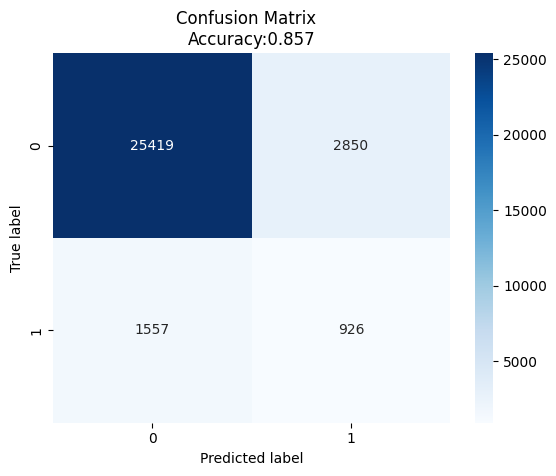

In [14]:
#C onfusion matrice ,accuracy
from sklearn import metrics
y_pred = ann.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred > 0.5)
sns.heatmap(cm,cmap='Blues',fmt='g', annot=True,xticklabels='auto',yticklabels='auto')
plt.title('Confusion Matrix  \nAccuracy:{0:.3f}'.format(metrics.accuracy_score(y_test, y_pred> 0.5)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

roc is : 0.757


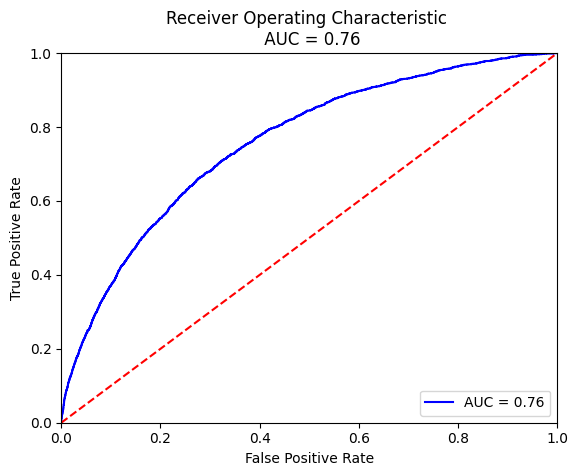

In [15]:
#Compute Area Under the Curve (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test+1, y_pred, pos_label=2)
roc_auc = metrics.auc(fpr, tpr)
print('roc is : %.3f' % roc_auc)

#plotting roc auc
plt.title('Receiver Operating Characteristic \n AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
del X_train_resampled, y_train_resampled

In [ ]:
gc.collect()

10117

In [ ]:
application_test = pd.read_csv('./data/application_test.csv')

In [ ]:
annPrediction = pd.DataFrame()
annPrediction['SK_ID_CURR'] = training_Data['SK_ID_CURR']
annPrediction['TARGET'] = ann.predict(training_Data[feats].values)
# Lọc các SK_ID_CURR ccủa 'application_test'
filtered_annPrediction = annPrediction[annPrediction['SK_ID_CURR'].isin(application_test['SK_ID_CURR'])]

# Ghi ra file CSV
filtered_annPrediction.to_csv('Chu_Duc_Huy_submission.csv', index=False)

# In ra DataFrame kết quả
print(filtered_annPrediction)

11133/11133 [==============================] - 18s 2ms/step
        SK_ID_CURR    TARGET
2           100013  0.064965
5           100028  0.085358
7           100042  0.148348
14          100066  0.023804
15          100067  0.104736
...            ...       ...
356250      449942  0.191883
356251      450148  0.070507
356252      450180  0.057160
356253      451383  0.133568
356254      454578  0.664480

[48744 rows x 2 columns]
